# 1. Carga y Comprensión Inicial de los Datos

- Cargar de los datos
- Dimensiones del Dataset
    - Conteo de Filas y Columnas
    - Relación n vs p
- Inspección de Tipos de Datos
    - Corregir las variables con tipos de datos equivocados
- Verificación de Cardinalidad de las Variables
    - Número de categorías únicas
    - Frecuencia de categorías por variable
    - Porcentaje de la categoría más frecuente
    - Identificar variables con valores nulos
- Cuantificación de Valores Faltantes
    - Porcentaje por variable.
    - Identificar columnas críticas.
    - Detectar patrones sistemáticos (MAR, MCAR, MNAR).
- Reporte Final de Hallazgos
- Guardar el dataset en parquet

## 1. Carga de los datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500)
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
## Carga de datos desde Dropbox

url = "https://www.dropbox.com/scl/fi/mbckz5ce5c5qke9330i4m/icfes.csv?rlkey=d9ipf96vuwbq6mmmjqnxfv3vw&st=ksckq0wg&dl=1"
icfes = pd.read_csv(url, sep=None, engine="python")

icfes.head(4)

,ESTU_TIPODOCUMENTO,ESTU_NACIONALIDAD,ESTU_GENERO,ESTU_FECHANACIMIENTO,PERIODO,ESTU_CONSECUTIVO,ESTU_ESTUDIANTE,ESTU_TIENEETNIA,ESTU_PAIS_RESIDE,ESTU_ETNIA,ESTU_DEPTO_RESIDE,ESTU_COD_RESIDE_DEPTO,ESTU_MCPIO_RESIDE,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,FAMI_TRABAJOLABORPADRE,FAMI_TRABAJOLABORMADRE,FAMI_TIENEINTERNET,FAMI_TIENESERVICIOTV,FAMI_TIENECOMPUTADOR,FAMI_TIENELAVADORA,FAMI_TIENEHORNOMICROOGAS,FAMI_TIENEAUTOMOVIL,FAMI_TIENEMOTOCICLETA,FAMI_TIENECONSOLAVIDEOJUEGOS,FAMI_NUMLIBROS,FAMI_COMELECHEDERIVADOS,FAMI_COMECARNEPESCADOHUEVO,FAMI_COMECEREALFRUTOSLEGUMBRE,FAMI_SITUACIONECONOMICA,ESTU_DEDICACIONLECTURADIARIA,ESTU_DEDICACIONINTERNET,ESTU_HORASSEMANATRABAJA,ESTU_TIPOREMUNERACION,COLE_CODIGO_ICFES,COLE_COD_DANE_ESTABLECIMIENTO,COLE_NOMBRE_ESTABLECIMIENTO,COLE_GENERO,COLE_NATURALEZA,COLE_CALENDARIO,COLE_BILINGUE,COLE_CARACTER,COLE_COD_DANE_SEDE,COLE_NOMBRE_SEDE,COLE_SEDE_PRINCIPAL,COLE_AREA_UBICACION,COLE_JORNADA,COLE_COD_MCPIO_UBICACION,COLE_MCPIO_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_DEPTO_UBICACION,ESTU_PRIVADO_LIBERTAD,ESTU_COD_MCPIO_PRESENTACION,ESTU_MCPIO_PRESENTACION,ESTU_DEPTO_PRESENTACION,ESTU_COD_DEPTO_PRESENTACION,PUNT_LECTURA_CRITICA,PERCENTIL_LECTURA_CRITICA,DESEMP_LECTURA_CRITICA,PUNT_MATEMATICAS,PERCENTIL_MATEMATICAS,DESEMP_MATEMATICAS,PUNT_C_NATURALES,PERCENTIL_C_NATURALES,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL,ESTU_NSE_INDIVIDUAL,ESTU_NSE_ESTABLECIMIENTO,ESTU_ESTADOINVESTIGACION,ESTU_GENERACION-E
0,TI,COLOMBIA,M,18/02/2002,20194,SB11201940031558,ESTUDIANTE,No,COLOMBIA,-,MAGDALENA,47,SANTA ANA,47707,Estrato 3,5 a 6,Cinco,Educación profesional completa,Secundaria (Bachillerato) completa,No aplica,"Trabaja en el hogar, no trabaja o estudia",Si,Si,No,Si,Si,No,No,No,MÁS DE 100 LIBROS,1 o 2 veces por semana,3 a 5 veces por semana,Nunca o rara vez comemos eso,Peor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",39008,"1,48E+11",INSTITUCION EDUCATIVA DEPARTAMENTAL ANTONIO BR...,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,"1,48E+11",COL DPTAL ANTONIO BRUGES CARMONA,S,URBANO,MAÑANA,47707,SANTA ANA,47,MAGDALENA,N,47707,SANTA ANA,MAGDALENA,47,47,33,2,48,42,2,37,15,1,30,8,1,54.00,67,A1,208,25,509.421.557.404.314,2,2.00,PUBLICAR,NO
1,TI,COLOMBIA,M,28/06/2003,20194,SB11201940303339,ESTUDIANTE,No,COLOMBIA,-,BOGOTÁ,11,BOGOTÁ D.C.,11001,Estrato 3,9 o más,Tres,Técnica o tecnológica completa,Técnica o tecnológica completa,Trabaja por cuenta propia (por ejemplo plomero...,Es dueño de un negocio pequeño (tiene pocos em...,Si,Si,Si,Si,Si,Si,No,No,MÁS DE 100 LIBROS,Todos o casi todos los días,3 a 5 veces por semana,1 o 2 veces por semana,Mejor,Entre 30 y 60 minutos,Entre 30 y 60 minutos,Menos de 10 horas,"Si, en efectivo",128611,"3,11E+11",GIMN SAN ANGELO,MIXTO,NO OFICIAL,A,-,ACADÉMICO,"3,11E+11",GIMN SAN ANGELO,S,URBANO,COMPLETA,11001,BOGOTÁ D.C.,11,BOGOTÁ,N,11001,BOGOTÁ D.C.,BOGOTÁ,11,60,76,3,65,88,3,54,71,2,59,83,3,63.00,88,A2,299,83,59.767.864.431.576,3,4.00,PUBLICAR,NO
2,TI,COLOMBIA,M,2/06/2001,20194,SB11201940255017,ESTUDIANTE,No,COLOMBIA,-,BOLIVAR,13,CARTAGENA DE INDIAS,13001,Estrato 1,5 a 6,Dos,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,Es vendedor o trabaja en atención al público,Es vendedor o trabaja en atención al público,No,Si,No,Si,No,No,No,No,26 A 100 LIBROS,Todos o casi todos los días,Todos o casi todos los días,3 a 5 veces por semana,Igual,Entre 30 y 60 minutos,Más de 3 horas,0,"Si, en efectivo",35493,"1,13E+11",INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,MIXTO,OFICIAL,A,N,TÉCNICO/ACADÉMICO,"1,13E+11",INSTITUCION EDUCATIVA PROMOCION SOCIAL DE C/GENA.,S,URBANO,MAÑANA,13001,CARTAGENA DE INDIAS,13,BOLIVAR,N,13001,CARTAGENA DE INDIAS,BOLIVAR,13,66,91,4,57,70,3,41,29,2,74,99,4,64.00,89,A2,299,84,507.642.383.644.749,2,3.00,PUBLICA

In [3]:
eliminar_col = ["PERIODO", "ESTU_TIPODOCUMENTO", "COLE_NOMBRE_ESTABLECIMIENTO", "ESTU_CONSECUTIVO", 'ESTU_PAIS_RESIDE', 
               "ESTU_ESTUDIANTE", "ESTU_COD_RESIDE_DEPTO", "ESTU_COD_RESIDE_MCPIO", "COLE_CODIGO_ICFES", 'COLE_BILINGUE', 
               "COLE_COD_DANE_ESTABLECIMIENTO", "COLE_COD_DANE_SEDE", "COLE_COD_MCPIO_UBICACION", 'COLE_CARACTER',
               "COLE_COD_DEPTO_UBICACION","ESTU_COD_DEPTO_PRESENTACION","ESTU_COD_DEPTO_PRESENTACION", 'ESTU_PRIVADO_LIBERTAD',
               "COLE_NOMBRE_SEDE", "ESTU_COD_MCPIO_PRESENTACION", "ESTU_ESTADOINVESTIGACION", "ESTU_GENERACION-E"]

icfes = icfes.drop(columns=eliminar_col)

## 2. Dimensiones del Dataset

### 2.1 Conteo de Filas y Columnas

In [4]:
print(f'El dataframe se compone por {icfes.shape[0]} filas y {icfes.shape[1]} columnas')

El dataframe se compone por 546212 filas y 61 columnas


### 2.2 Relación N vs P

In [5]:
filas = icfes.shape[0]
columnas = icfes.shape[1]

print(f'La relación entre {icfes.shape[0]} filas y {icfes.shape[1]} columnas es de {round(filas/columnas)} observaciones por cada variable')

La relación entre 546212 filas y 61 columnas es de 8954 observaciones por cada variable


## 3. Inspección de Tipos de Datos

### 3.1 Conteo de Tipos de Variables

In [6]:
# Numéricas
num_vars = icfes.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("\nVariables numéricas:", len(num_vars))
print(num_vars)

# Categóricas
cat_vars = icfes.select_dtypes(include=["object"]).columns.tolist()
print("\nVariables categóricas:", len(cat_vars))
print(cat_vars)

# Booleanas
bools_vars = icfes.select_dtypes(include=["bool"]).columns.tolist()
print("\nVariables booleanas:", len(bools_vars))
print(bools_vars)

# Fechas
fecha_vars = icfes.select_dtypes(include=["datetime"]).columns.tolist()
print("\nVariables de tipo fecha:", len(fecha_vars))
print(fecha_vars)


Variables numéricas: 16
['PUNT_LECTURA_CRITICA', 'PERCENTIL_LECTURA_CRITICA', 'DESEMP_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PERCENTIL_MATEMATICAS', 'DESEMP_MATEMATICAS', 'PUNT_C_NATURALES', 'PERCENTIL_C_NATURALES', 'DESEMP_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PERCENTIL_SOCIALES_CIUDADANAS', 'DESEMP_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PERCENTIL_INGLES', 'PUNT_GLOBAL', 'ESTU_NSE_ESTABLECIMIENTO']

Variables categóricas: 45
['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO', 'ESTU_TIENEETNIA', 'ESTU_ETNIA', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECARNEPESC

In [7]:
icfes.columns

Index(['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'ESTU_FECHANACIMIENTO',
       'ESTU_TIENEETNIA', 'ESTU_ETNIA', 'ESTU_DEPTO_RESIDE',
       'ESTU_MCPIO_RESIDE', 'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR',
       'FAMI_CUARTOSHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE',
       'FAMI_TRABAJOLABORPADRE', 'FAMI_TRABAJOLABORMADRE',
       'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_GENERO', 'COLE_NATURALEZA',
       'COLE_CALENDARIO', 'COLE_SEDE_PRINCIPAL', 'COLE_AREA_UBICACION',
       'COLE_JORNADA', 'COLE_MCPIO_UBICACION', 'COLE_DEPT

## 4. Verificación de Cardinalidad de Variables

### 4.1 Número de Categorías Únicas

In [8]:
# Filtrar variables categóricas
cat_vars = icfes.select_dtypes(include=['object'])

# Número de categorías únicas por variable
cardinalidad = cat_vars.nunique().sort_values(ascending=False)
print(cardinalidad)

ESTU_INSE_INDIVIDUAL             469865
ESTU_FECHANACIMIENTO              11663
ESTU_MCPIO_RESIDE                  1031
COLE_MCPIO_UBICACION               1030
ESTU_MCPIO_PRESENTACION             472
PERCENTIL_GLOBAL                    101
ESTU_DEPTO_RESIDE                    34
COLE_DEPTO_UBICACION                 33
ESTU_DEPTO_PRESENTACION              33
ESTU_NACIONALIDAD                    33
ESTU_ETNIA                           21
FAMI_TRABAJOLABORPADRE               14
FAMI_TRABAJOLABORMADRE               14
FAMI_EDUCACIONPADRE                  13
FAMI_EDUCACIONMADRE                  13
FAMI_ESTRATOVIVIENDA                  8
FAMI_CUARTOSHOGAR                     7
COLE_JORNADA                          6
ESTU_HORASSEMANATRABAJA               6
FAMI_PERSONASHOGAR                    6
ESTU_DEDICACIONLECTURADIARIA          6
ESTU_DEDICACIONINTERNET               6
ESTU_TIPOREMUNERACION                 5
ESTU_NSE_INDIVIDUAL                   5
FAMI_NUMLIBROS                        5


### 4.2 Frecuencia de Categorías por Variable

In [9]:
for col in cat_vars.columns:
    print(f"\nVariable: {col} ({cat_vars[col].nunique()} categorías)")
    print(cat_vars[col].value_counts().head(5))  # top 5 categorías


Variable: ESTU_NACIONALIDAD (33 categorías)
ESTU_NACIONALIDAD
COLOMBIA          544918
VENEZUELA           1109
ESTADOS UNIDOS        52
ESPAÑA                33
ECUADOR               26
Name: count, dtype: int64

Variable: ESTU_GENERO (3 categorías)
ESTU_GENERO
F    295994
M    250097
-       121
Name: count, dtype: int64

Variable: ESTU_FECHANACIMIENTO (11663 categorías)
ESTU_FECHANACIMIENTO
1/01/1900     1826
20/09/2002     866
17/09/2002     859
13/09/2002     851
24/09/2002     850
Name: count, dtype: int64

Variable: ESTU_TIENEETNIA (3 categorías)
ESTU_TIENEETNIA
No    506074
Si     39761
-        377
Name: count, dtype: int64

Variable: ESTU_ETNIA (21 categorías)
ESTU_ETNIA
-                                506203
Comunidad afrodescendiente        19534
Ninguno                            4442
Zenú                               3281
Otro grupo étnico minoritario      3150
Name: count, dtype: int64

Variable: ESTU_DEPTO_RESIDE (34 categorías)
ESTU_DEPTO_RESIDE
BOGOTÁ          8360

### 4.3 Porcentaje de las Categorías Frecuentes

In [10]:
for col in cat_vars:
    print(f"\nDistribución porcentual de '{col}':")
    print(icfes[col].value_counts(normalize=True).mul(100).round(3).astype(str) + '%')


Distribución porcentual de 'ESTU_NACIONALIDAD':
ESTU_NACIONALIDAD
COLOMBIA                  99.763%
VENEZUELA                  0.203%
ESTADOS UNIDOS              0.01%
ESPAÑA                     0.006%
ECUADOR                    0.005%
PERÚ                       0.001%
MÉXICO                     0.001%
CUBA                       0.001%
ITALIA                     0.001%
BOLIVIA                    0.001%
BRASIL                     0.001%
COSTA RICA                 0.001%
ARGENTINA                  0.001%
EL SALVADOR                0.001%
COMORAS                    0.001%
CHILE                      0.001%
FRANCIA                    0.001%
CHINA                        0.0%
COREA DEL NORTE              0.0%
REPÚBLICA DOMINICANA         0.0%
PAÍSES BAJOS - HOLANDA       0.0%
TAIWAN                       0.0%
ALBANIA                      0.0%
CROACIA                      0.0%
REINO UNIDO                  0.0%
DINAMARCA                    0.0%
ALEMANIA                     0.0%
ARUBA          

In [11]:
# Crear un diccionario con el número de nulos por variable categórica
nulos_cat = {col: icfes[col].isna().sum() for col in cat_vars if icfes[col].isna().sum() > 0}

# Convertir a DataFrame para poder ordenarlo
nulos_df = (
    pd.DataFrame.from_dict(nulos_cat, orient='index', columns=['nulos'])
    .sort_values(by='nulos', ascending=False)
)

# Imprimir resultados
print(f"\nHay {nulos_df.shape[0]} variables categóricas con valores nulos.\n")
print(nulos_df)



Hay 28 variables categóricas con valores nulos.

                               nulos
ESTU_DEDICACIONINTERNET        30298
FAMI_COMECEREALFRUTOSLEGUMBRE  22332
FAMI_COMELECHEDERIVADOS        22305
FAMI_TIENESERVICIOTV           22280
FAMI_EDUCACIONMADRE            20959
ESTU_NSE_INDIVIDUAL            17041
ESTU_TIPOREMUNERACION          15508
FAMI_COMECARNEPESCADOHUEVO      9625
FAMI_TIENEMOTOCICLETA           8817
FAMI_NUMLIBROS                  8654
FAMI_TIENEHORNOMICROOGAS        8630
FAMI_PERSONASHOGAR              8463
FAMI_TIENEINTERNET              8337
FAMI_EDUCACIONPADRE             8292
FAMI_SITUACIONECONOMICA         8259
FAMI_TIENEAUTOMOVIL             8206
FAMI_TIENECOMPUTADOR            8185
FAMI_TRABAJOLABORPADRE          8131
FAMI_TIENECONSOLAVIDEOJUEGOS    7725
FAMI_TIENELAVADORA              7643
FAMI_TRABAJOLABORMADRE          7469
FAMI_CUARTOSHOGAR               6418
ESTU_DEDICACIONLECTURADIARIA     627
ESTU_HORASSEMANATRABAJA          381
ESTU_DEPTO_RESIDE        

## 5. Identificar Valores Faltantes

### 5.1 Porcentaje por Variable

In [12]:
print(f'El dataset tiene un total de {icfes.isna().sum().sum()} filas con valores nulos o NAs')

El dataset tiene un total de 275432 filas con valores nulos o NAs


In [13]:
# Conteo de NA por fila
row_na = icfes.isna().sum(axis=1)

# Filas con más del 50% de NA
incompletas = icfes[row_na > (icfes.shape[1] / 2)]
print(incompletas.shape)

(0, 61)


In [14]:
# Filtrar solo las columnas con NA
na_counts = icfes.isna().sum()
na_counts = na_counts[na_counts > 0]  # Solo variables con NAs

# Calcular el porcentaje de NAs sobre el total de observaciones
na_percentage = (na_counts / len(icfes)) * 100

# Crear DataFrame con los resultados
na_summary = pd.DataFrame({'Variable': na_counts.index, 'Conteo_NA': na_counts.values, 'Porcentaje_NA': na_percentage.values})

# Ordenar por porcentaje de NA
na_summary = na_summary.sort_values(by="Porcentaje_NA", ascending=False)

# Mostrar la tabla
print(na_summary)

                         Variable  Conteo_NA  Porcentaje_NA
23        ESTU_DEDICACIONINTERNET      30298           5.55
20  FAMI_COMECEREALFRUTOSLEGUMBRE      22332           4.09
18        FAMI_COMELECHEDERIVADOS      22305           4.08
10           FAMI_TIENESERVICIOTV      22280           4.08
6             FAMI_EDUCACIONMADRE      20959           3.84
28            ESTU_NSE_INDIVIDUAL      17041           3.12
25          ESTU_TIPOREMUNERACION      15508           2.84
19     FAMI_COMECARNEPESCADOHUEVO       9625           1.76
15          FAMI_TIENEMOTOCICLETA       8817           1.61
17                 FAMI_NUMLIBROS       8654           1.58
13       FAMI_TIENEHORNOMICROOGAS       8630           1.58
3              FAMI_PERSONASHOGAR       8463           1.55
9              FAMI_TIENEINTERNET       8337           1.53
5             FAMI_EDUCACIONPADRE       8292           1.52
21        FAMI_SITUACIONECONOMICA       8259           1.51
14            FAMI_TIENEAUTOMOVIL       

### 5.2 Identificar Columnas Críticas

In [15]:
# Inicializar listas vacías
cat_nulos = []
num_nulos = []

# Recorrer todas las columnas del DataFrame
for col in icfes.columns:
    n_nulos = icfes[col].isna().sum()
    
    if n_nulos > 1000:
        if icfes[col].dtype in ['object', 'category']:
            cat_nulos.append((col, n_nulos))
        elif pd.api.types.is_numeric_dtype(icfes[col]):
            num_nulos.append((col, n_nulos))

# Convertir a DataFrame para mejor visualización y ordenarlos
cat_nulos_df = pd.DataFrame(cat_nulos, columns=['Variable', 'Nulos']).sort_values('Nulos', ascending=False)
num_nulos_df = pd.DataFrame(num_nulos, columns=['Variable', 'Nulos']).sort_values('Nulos', ascending=False)

# Imprimir resultados
print(f"\n🔹 Variables Categóricas con más de 1000 valores nulos: {len(cat_nulos_df)}")
print(cat_nulos_df.to_string(index=False))

print(f"\n🔹 Variables Numéricas con más de 1000 valores nulos: {len(num_nulos_df)}")
print(num_nulos_df.to_string(index=False))



🔹 Variables Categóricas con más de 1000 valores nulos: 22
                     Variable  Nulos
      ESTU_DEDICACIONINTERNET  30298
FAMI_COMECEREALFRUTOSLEGUMBRE  22332
      FAMI_COMELECHEDERIVADOS  22305
         FAMI_TIENESERVICIOTV  22280
          FAMI_EDUCACIONMADRE  20959
          ESTU_NSE_INDIVIDUAL  17041
        ESTU_TIPOREMUNERACION  15508
   FAMI_COMECARNEPESCADOHUEVO   9625
        FAMI_TIENEMOTOCICLETA   8817
               FAMI_NUMLIBROS   8654
     FAMI_TIENEHORNOMICROOGAS   8630
           FAMI_PERSONASHOGAR   8463
           FAMI_TIENEINTERNET   8337
          FAMI_EDUCACIONPADRE   8292
      FAMI_SITUACIONECONOMICA   8259
          FAMI_TIENEAUTOMOVIL   8206
         FAMI_TIENECOMPUTADOR   8185
       FAMI_TRABAJOLABORPADRE   8131
 FAMI_TIENECONSOLAVIDEOJUEGOS   7725
           FAMI_TIENELAVADORA   7643
       FAMI_TRABAJOLABORMADRE   7469
            FAMI_CUARTOSHOGAR   6418

🔹 Variables Numéricas con más de 1000 valores nulos: 0
Empty DataFrame
Columns: [Variable

### 5.3 Detectar Patrones Sistemáticos

<Axes: >

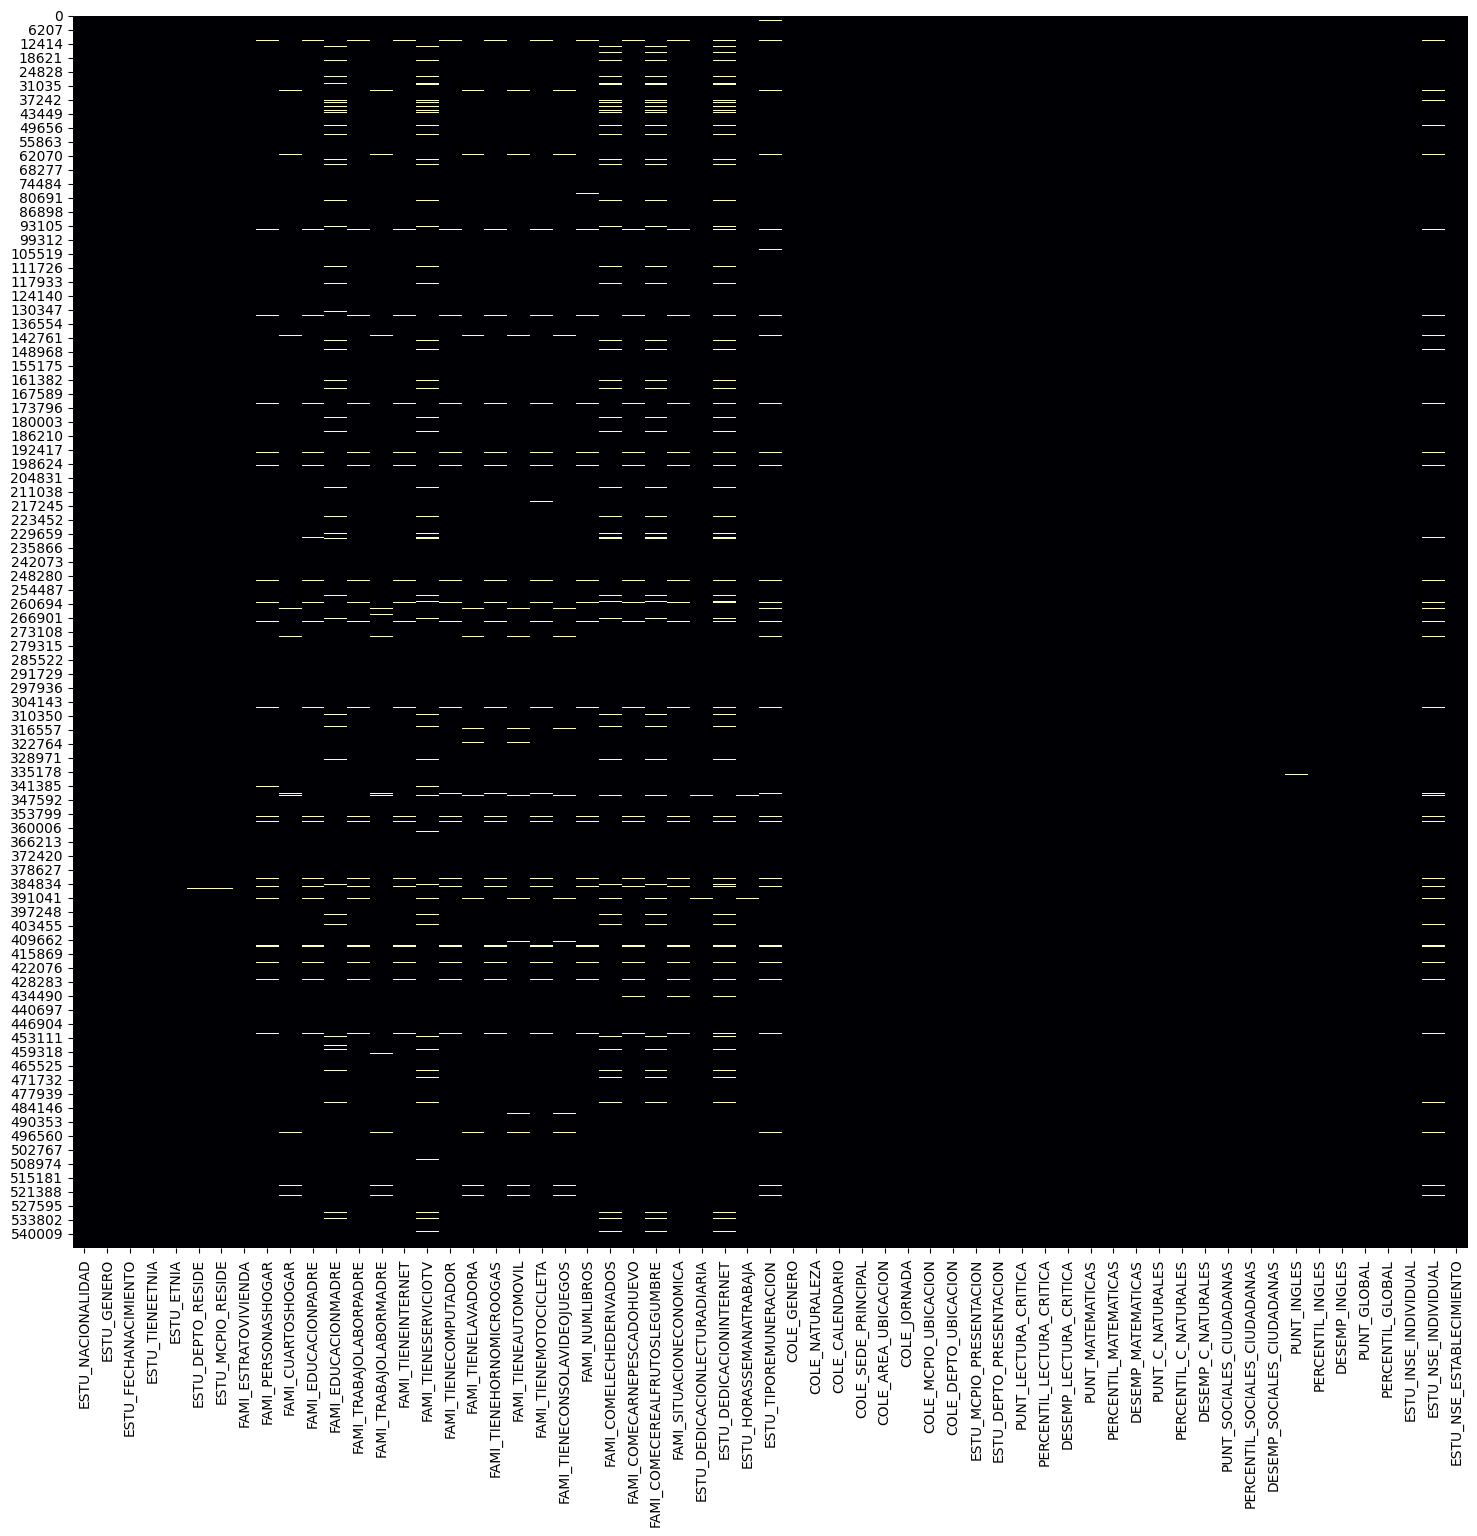

In [16]:
plt.figure(figsize=(18, 16))
sns.heatmap(icfes.isnull(),cmap = 'magma',cbar = False)

<Axes: >

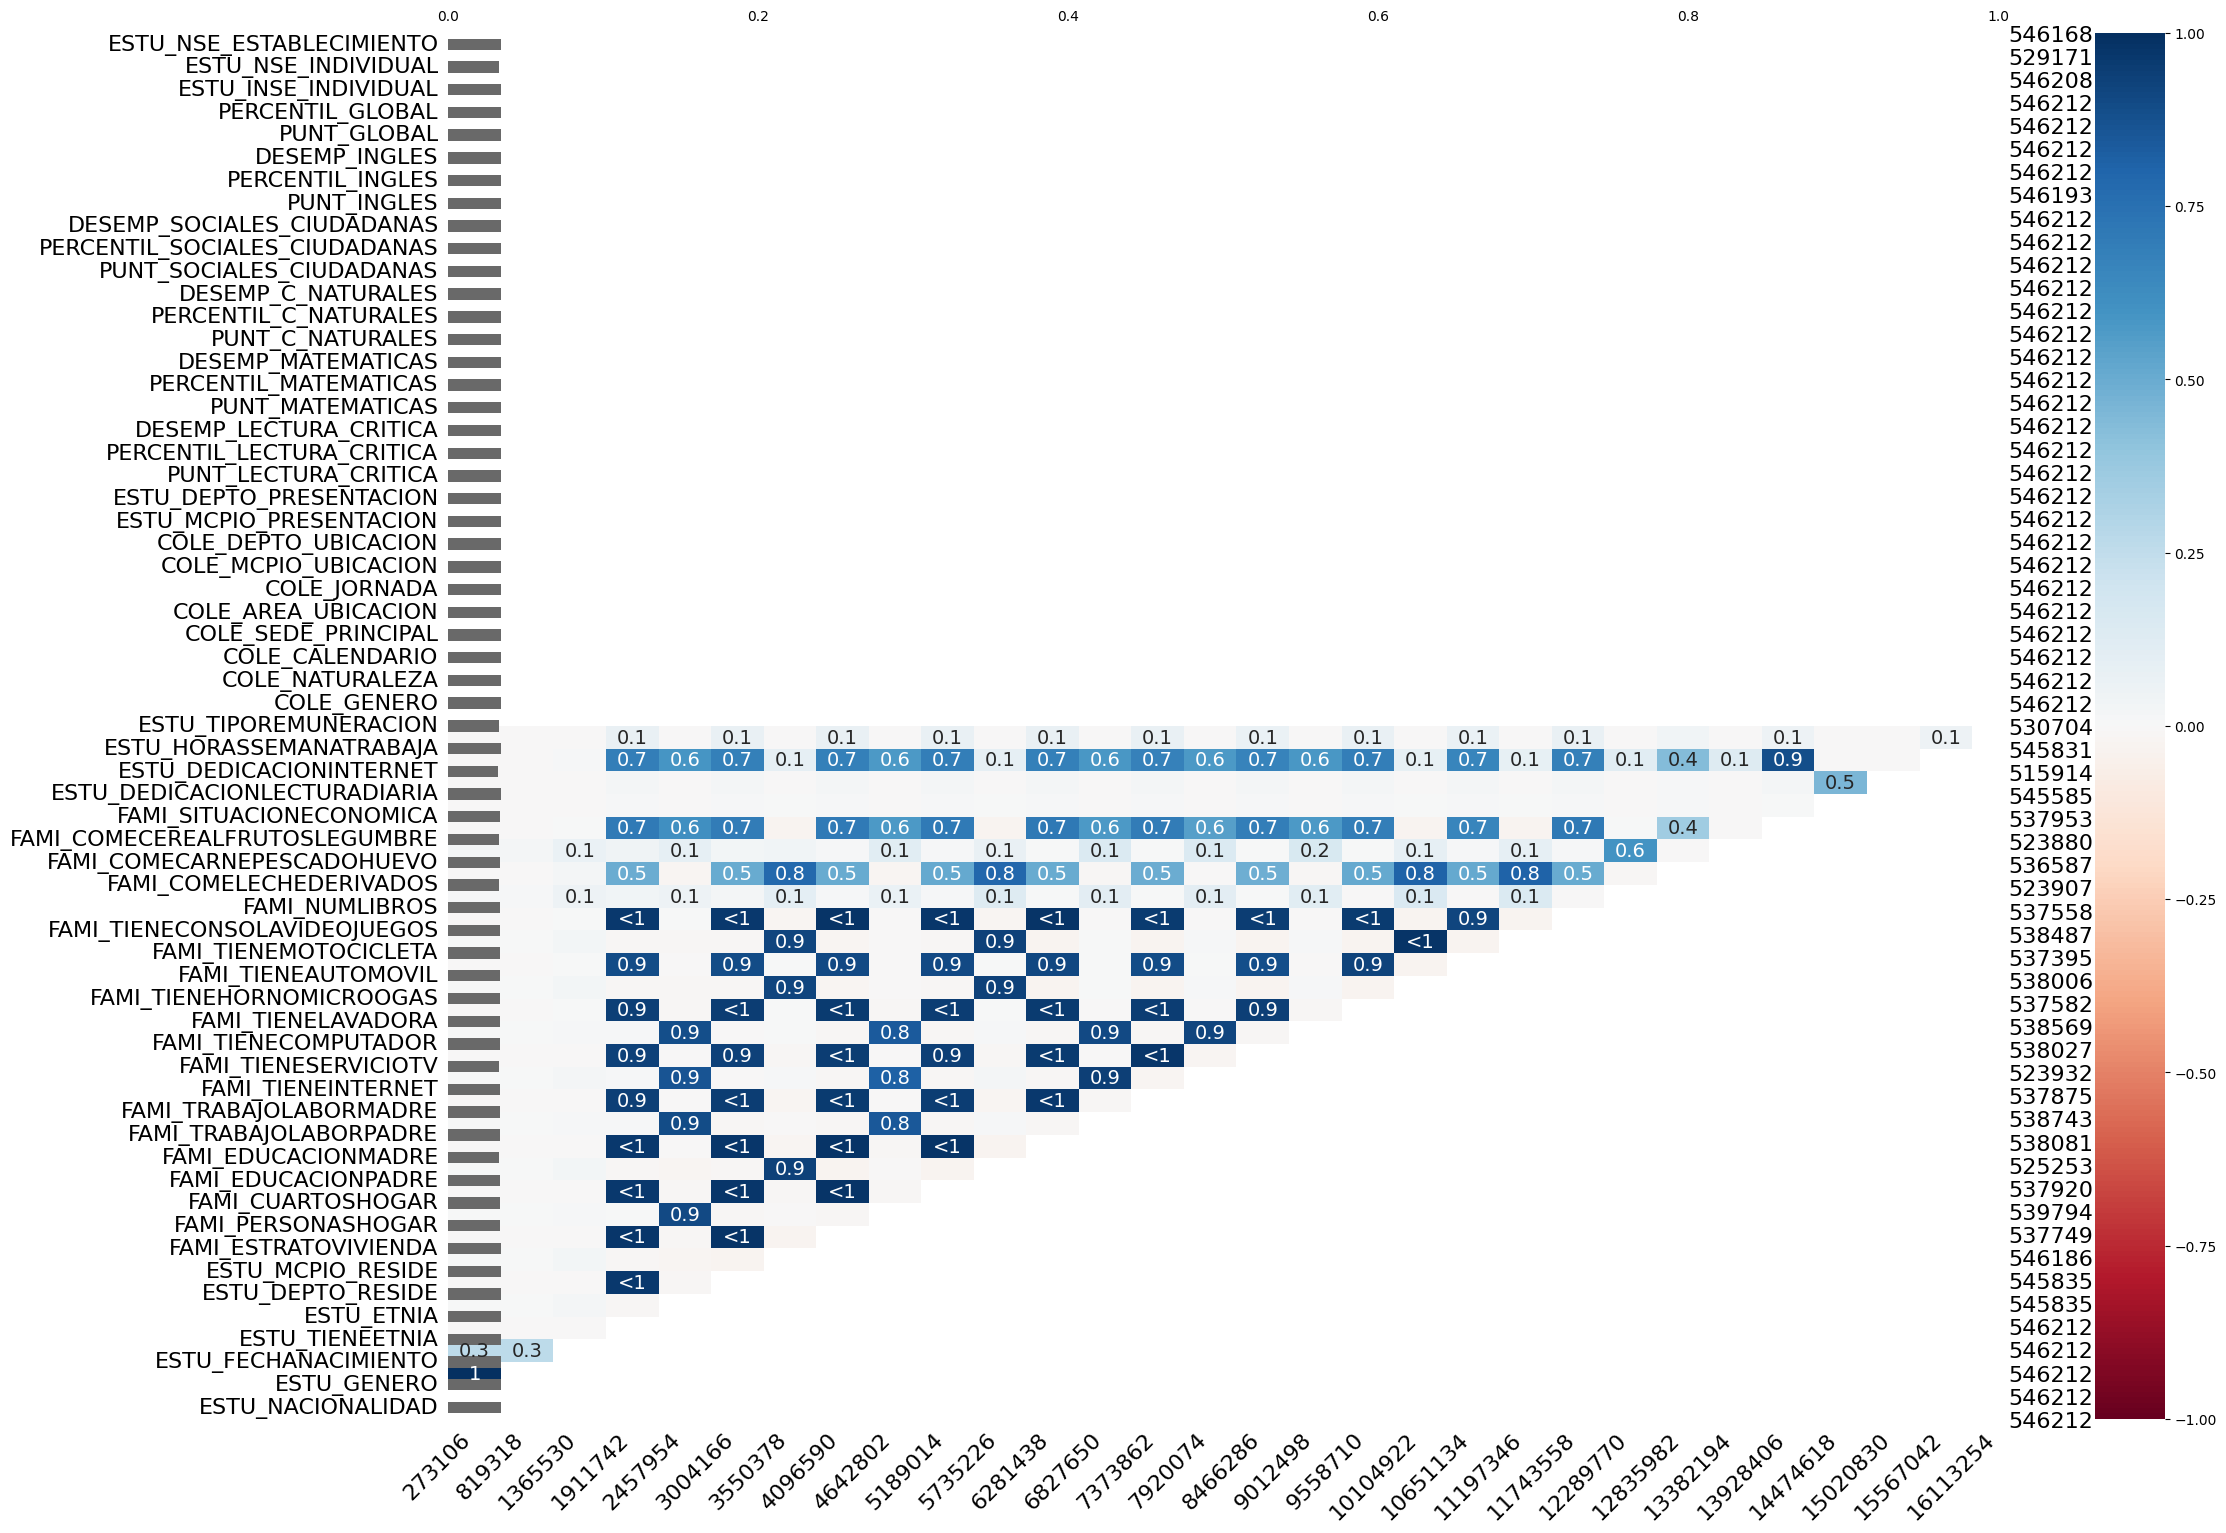

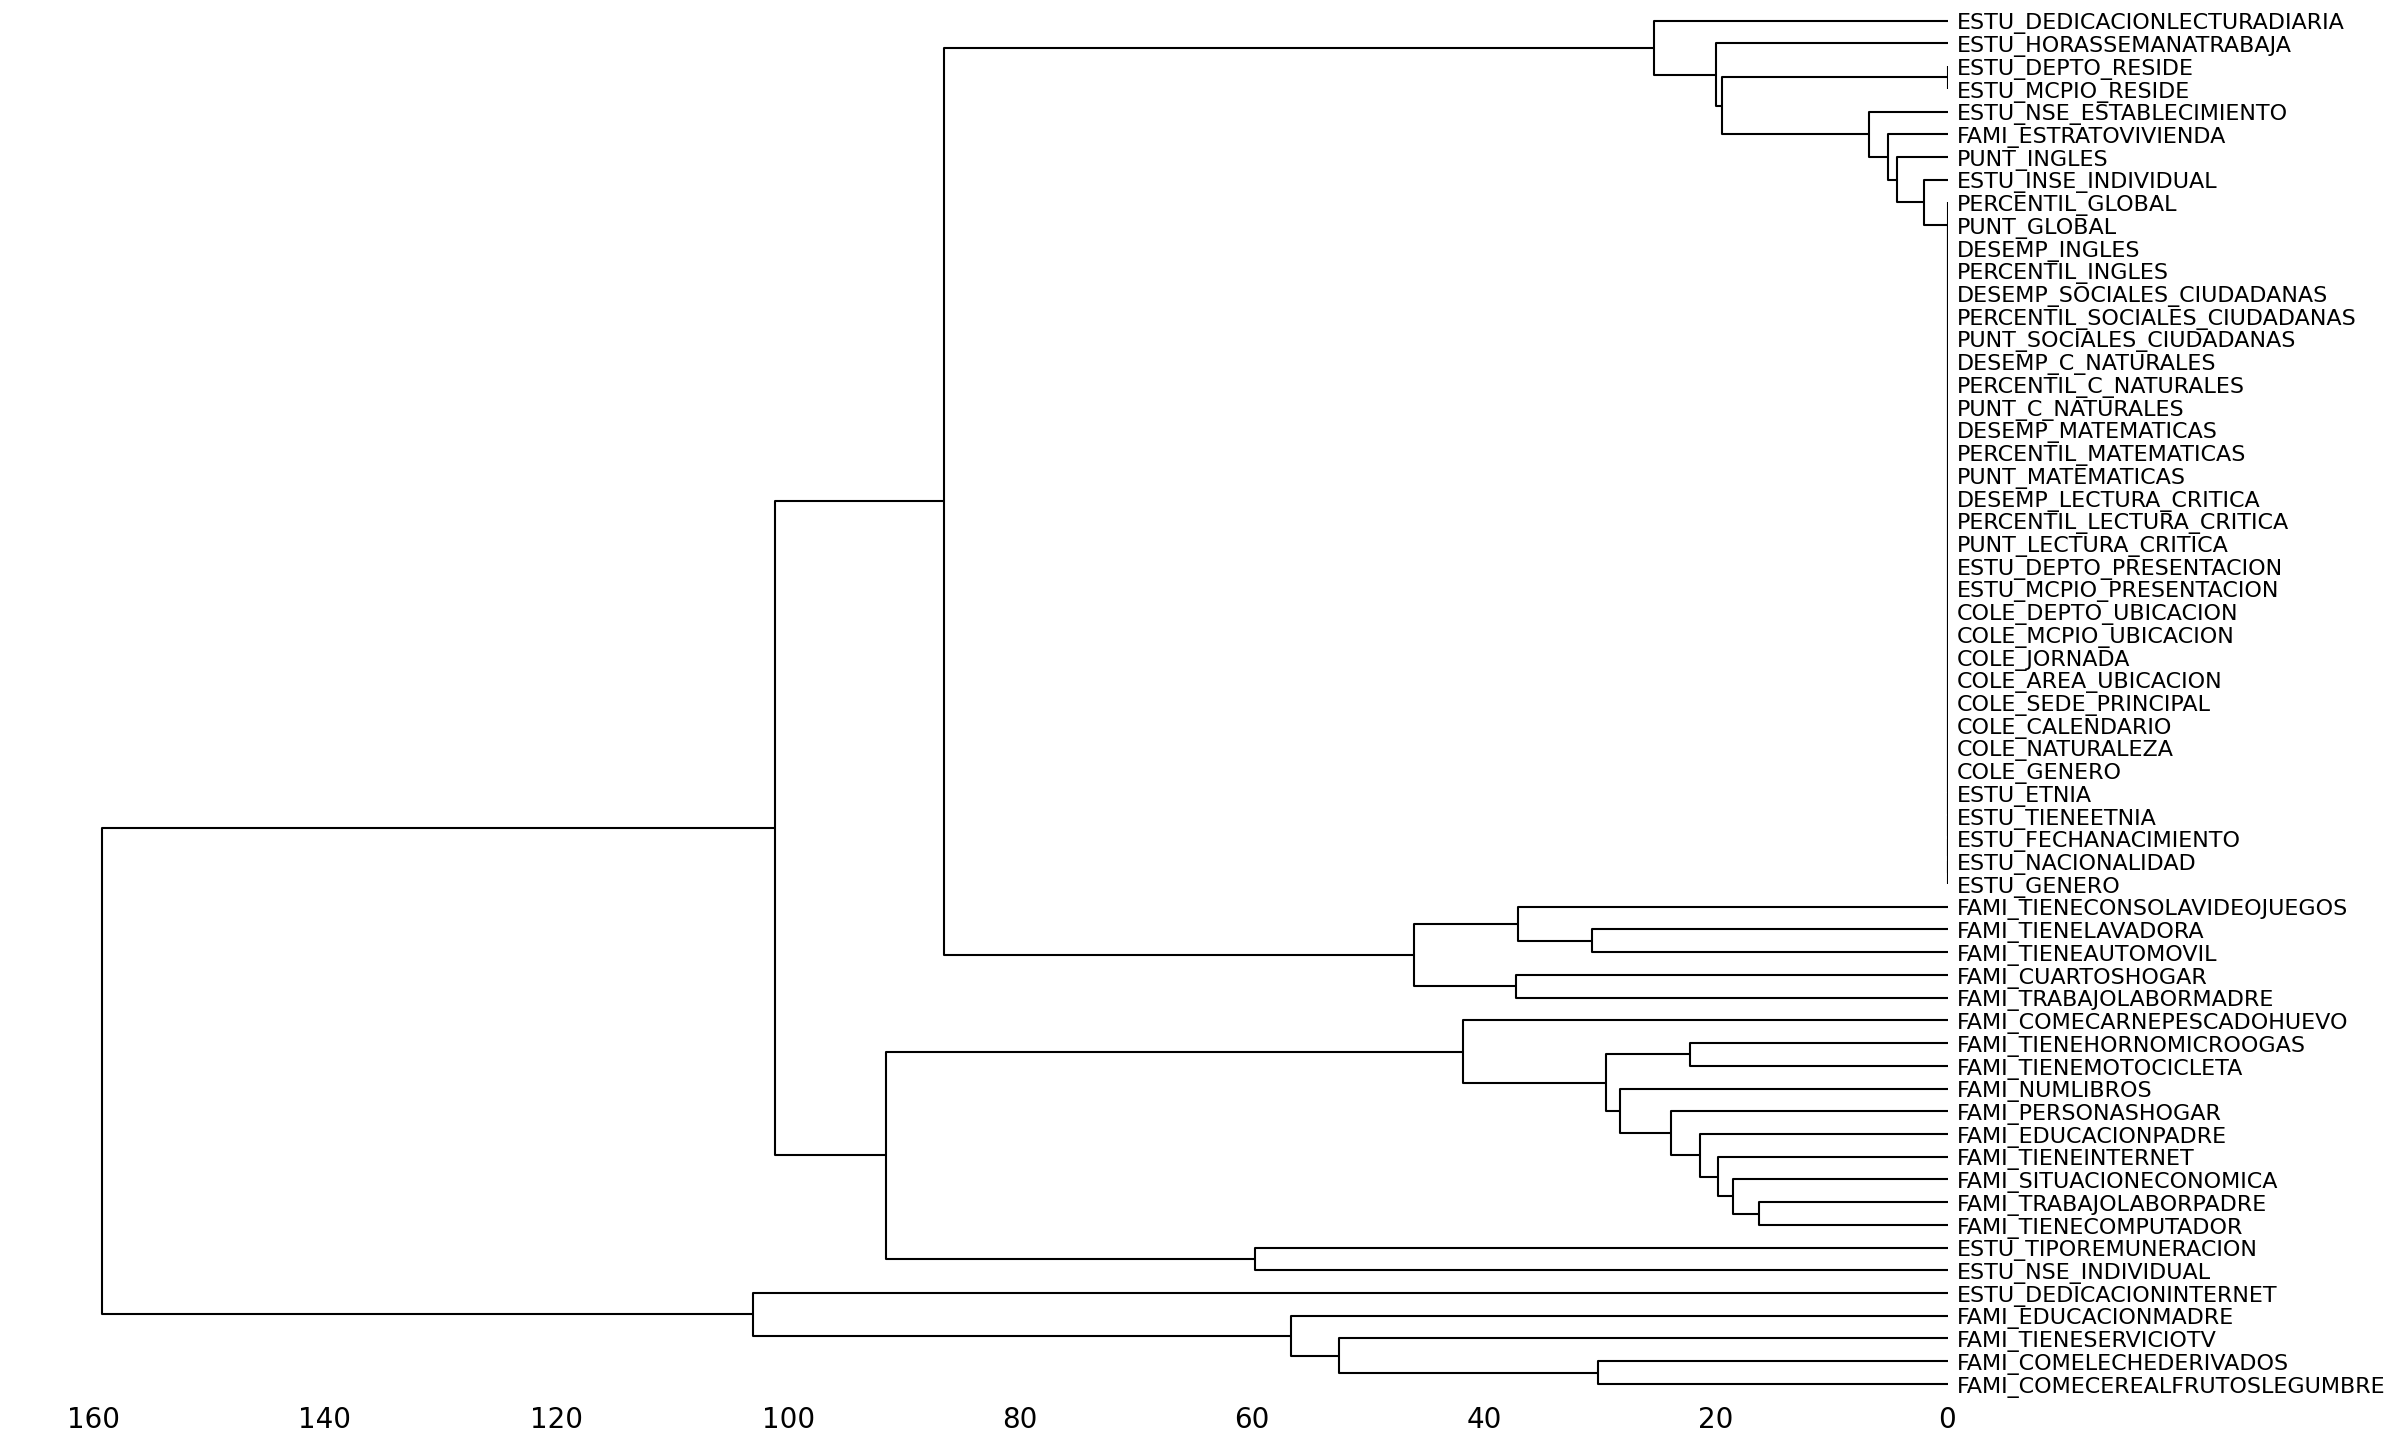

In [17]:
import missingno as msno

# Mapa de calor de correlación de NAs
msno.heatmap(icfes)

# Gráfico de barras por variable
msno.bar(icfes)

# Dendrograma para ver patrones de NA compartidos
msno.dendrogram(icfes)

In [18]:
import pandas as pd

# Matriz de correlación de NAs
na_corr = icfes.isna().corr()

# Umbral de correlación (ajústalo si quieres ser más estricto o más laxo)
threshold = 0.8

# Para guardar los grupos
clusters = []
visited = set()

for col in na_corr.columns:
    if col not in visited:
        # Encuentra todas las variables correlacionadas con 'col' >= threshold
        correlated = na_corr.index[na_corr[col] >= threshold].tolist()
        
        # Si hay más de una variable, consideramos que forman grupo
        if len(correlated) > 1:
            clusters.append(correlated)
            visited.update(correlated)

# Mostrar resultados
for i, cluster in enumerate(clusters, 1):
    print(f"🔹 Grupo {i}: {cluster}")


🔹 Grupo 1: ['ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE']
🔹 Grupo 2: ['FAMI_PERSONASHOGAR', 'FAMI_EDUCACIONPADRE', 'FAMI_TRABAJOLABORPADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEMOTOCICLETA', 'FAMI_NUMLIBROS', 'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_SITUACIONECONOMICA']
🔹 Grupo 3: ['FAMI_CUARTOSHOGAR', 'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECONSOLAVIDEOJUEGOS']
🔹 Grupo 4: ['FAMI_EDUCACIONMADRE', 'FAMI_TIENESERVICIOTV', 'FAMI_COMELECHEDERIVADOS', 'FAMI_COMECEREALFRUTOSLEGUMBRE']
🔹 Grupo 5: ['FAMI_COMELECHEDERIVADOS', 'FAMI_COMECEREALFRUTOSLEGUMBRE', 'ESTU_DEDICACIONINTERNET']
🔹 Grupo 6: ['ESTU_TIPOREMUNERACION', 'ESTU_NSE_INDIVIDUAL']


## 6. Reporte Final de Hallazgos

### 🔹 Número de Variables

Se eliminaron variables que no aportan nada al entrenamiento del modelo. La selección de las variables es arbitraria y por conocimiento de los datos.

Entre las variables descartadas se incluyen:
- **`PERIODO`** → año de presentación del examen.  
- **Códigos del DANE** (departamentos, colegios, etc.) → no tienen valor predictivo.  
- **Datos personales o administrativos** → tipo de documento, país de residencia (no nacionalidad), condición de reclusión, proceso judicial.  
- **`ESTU_GENERACIONE` (beca)** → representa *data leakage*, pues depende directamente del puntaje obtenido en el examen.

---

### 📏 Dimensiones del Dataset

Después de la depuración, el dataset queda conformado por:

- **546.212 observaciones (filas)**  
- **61 variables (columnas)**  

---

### 🔢 Tipos de Variables

El dataset contiene tres tipos principales de variables:

| Tipo de Variable | Cantidad |
|------------------|-----------|
| Numéricas        | 16        |
| Categóricas      | 44        |
| Fecha            | 1         |
| **Total**        | 61        |

---

### 🧩 Cardinalidad de Variables Categóricas

Las variables con **mayor cardinalidad** son aquellas con **componente geográfico**, como:

- Municipio y departamento de residencia.  
- Variables de pertenencia étnica.  
- Actividad laboral de los padres del estudiante.  
- Nivel educativo de los padres.

Estas variables presentan una alta diversidad de categorías, lo cual puede requerir **codificación especial (por ejemplo, one hot encoding o embeddings)** si se incluyen en el modelo.

---

### ⚠️ Valores Faltantes

- Se identificaron **292.476 filas con al menos un valor nulo**.  
- Las variables con **más valores faltantes** corresponden principalmente a **preguntas de consumo o uso de recursos**, como:
  - Tiempo dedicado a Internet.  
  - Consumo de cereales, carne o productos lácteos.  

> Este análisis es preliminar: solo considera el conteo de valores nulos.  
> Sin embargo, a priori, muchos parecen ser **faltantes MAR (Missing At Random)**.  
> Por ejemplo, la ausencia de respuesta en “tiempo dedicado a Internet” puede deberse a que el hogar **no posee conexión o dispositivos**.

---

✅ **Resumen General**

| Aspecto                     | Resultado |
|-----------------------------|------------|
| Observaciones               | 546,212    |
| Variables totales           | 61         |
| Variables numéricas          | 16         |
| Variables categóricas        | 44         |
| Variables tipo fecha         | 1          |
| Filas con valores nulos     | 292,476    |

---

## 7. Guardar Dataset en Parquet

In [19]:
import pandas as pd

# Guardar en parquet sin el índice
icfes.to_parquet("C:/Users/CACTU/Downloads/Proyectos/prediccion-icfes-colombia/data/raw/icfes.parquet", index=False)